<a href="https://colab.research.google.com/github/Fcazarez/Ecuador_Data_Science/blob/main/Copia_de_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data= pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Ciencia de Datos Ec/Simpsons/input/simpsons.csv', sep=";")
data.head()

,tasa_dislike_totallike,porcentaje_presup_incidentes,porcentaje_animadores_totemple,se_patrocino,indice_retraso_grabacion,n_prom_editores,edad_prom_equipo_graba,tiempo_brainstorming,n_plataformas_hab_edic,imp_pagado,n_editores_clips,gasto_rodaje,gasto_alimentacion,ganancia_tot_ep
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

In [5]:
colnames=data.columns.values.tolist()
predictors= colnames[:13]
target=colnames[13]
X=data[predictors]
Y=data[target]

In [6]:
X

,tasa_dislike_totallike,porcentaje_presup_incidentes,porcentaje_animadores_totemple,se_patrocino,indice_retraso_grabacion,n_prom_editores,edad_prom_equipo_graba,tiempo_brainstorming,n_plataformas_hab_edic,imp_pagado,n_editores_clips,gasto_rodaje,gasto_alimentacion
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: ganancia_tot_ep, Length: 506, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeRegressor

Árbol de decisión

In [9]:
regtree= DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth=5, random_state=42)

In [10]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=30,
                      random_state=42)

In [11]:
from matplotlib import pyplot as plt
from sklearn import tree

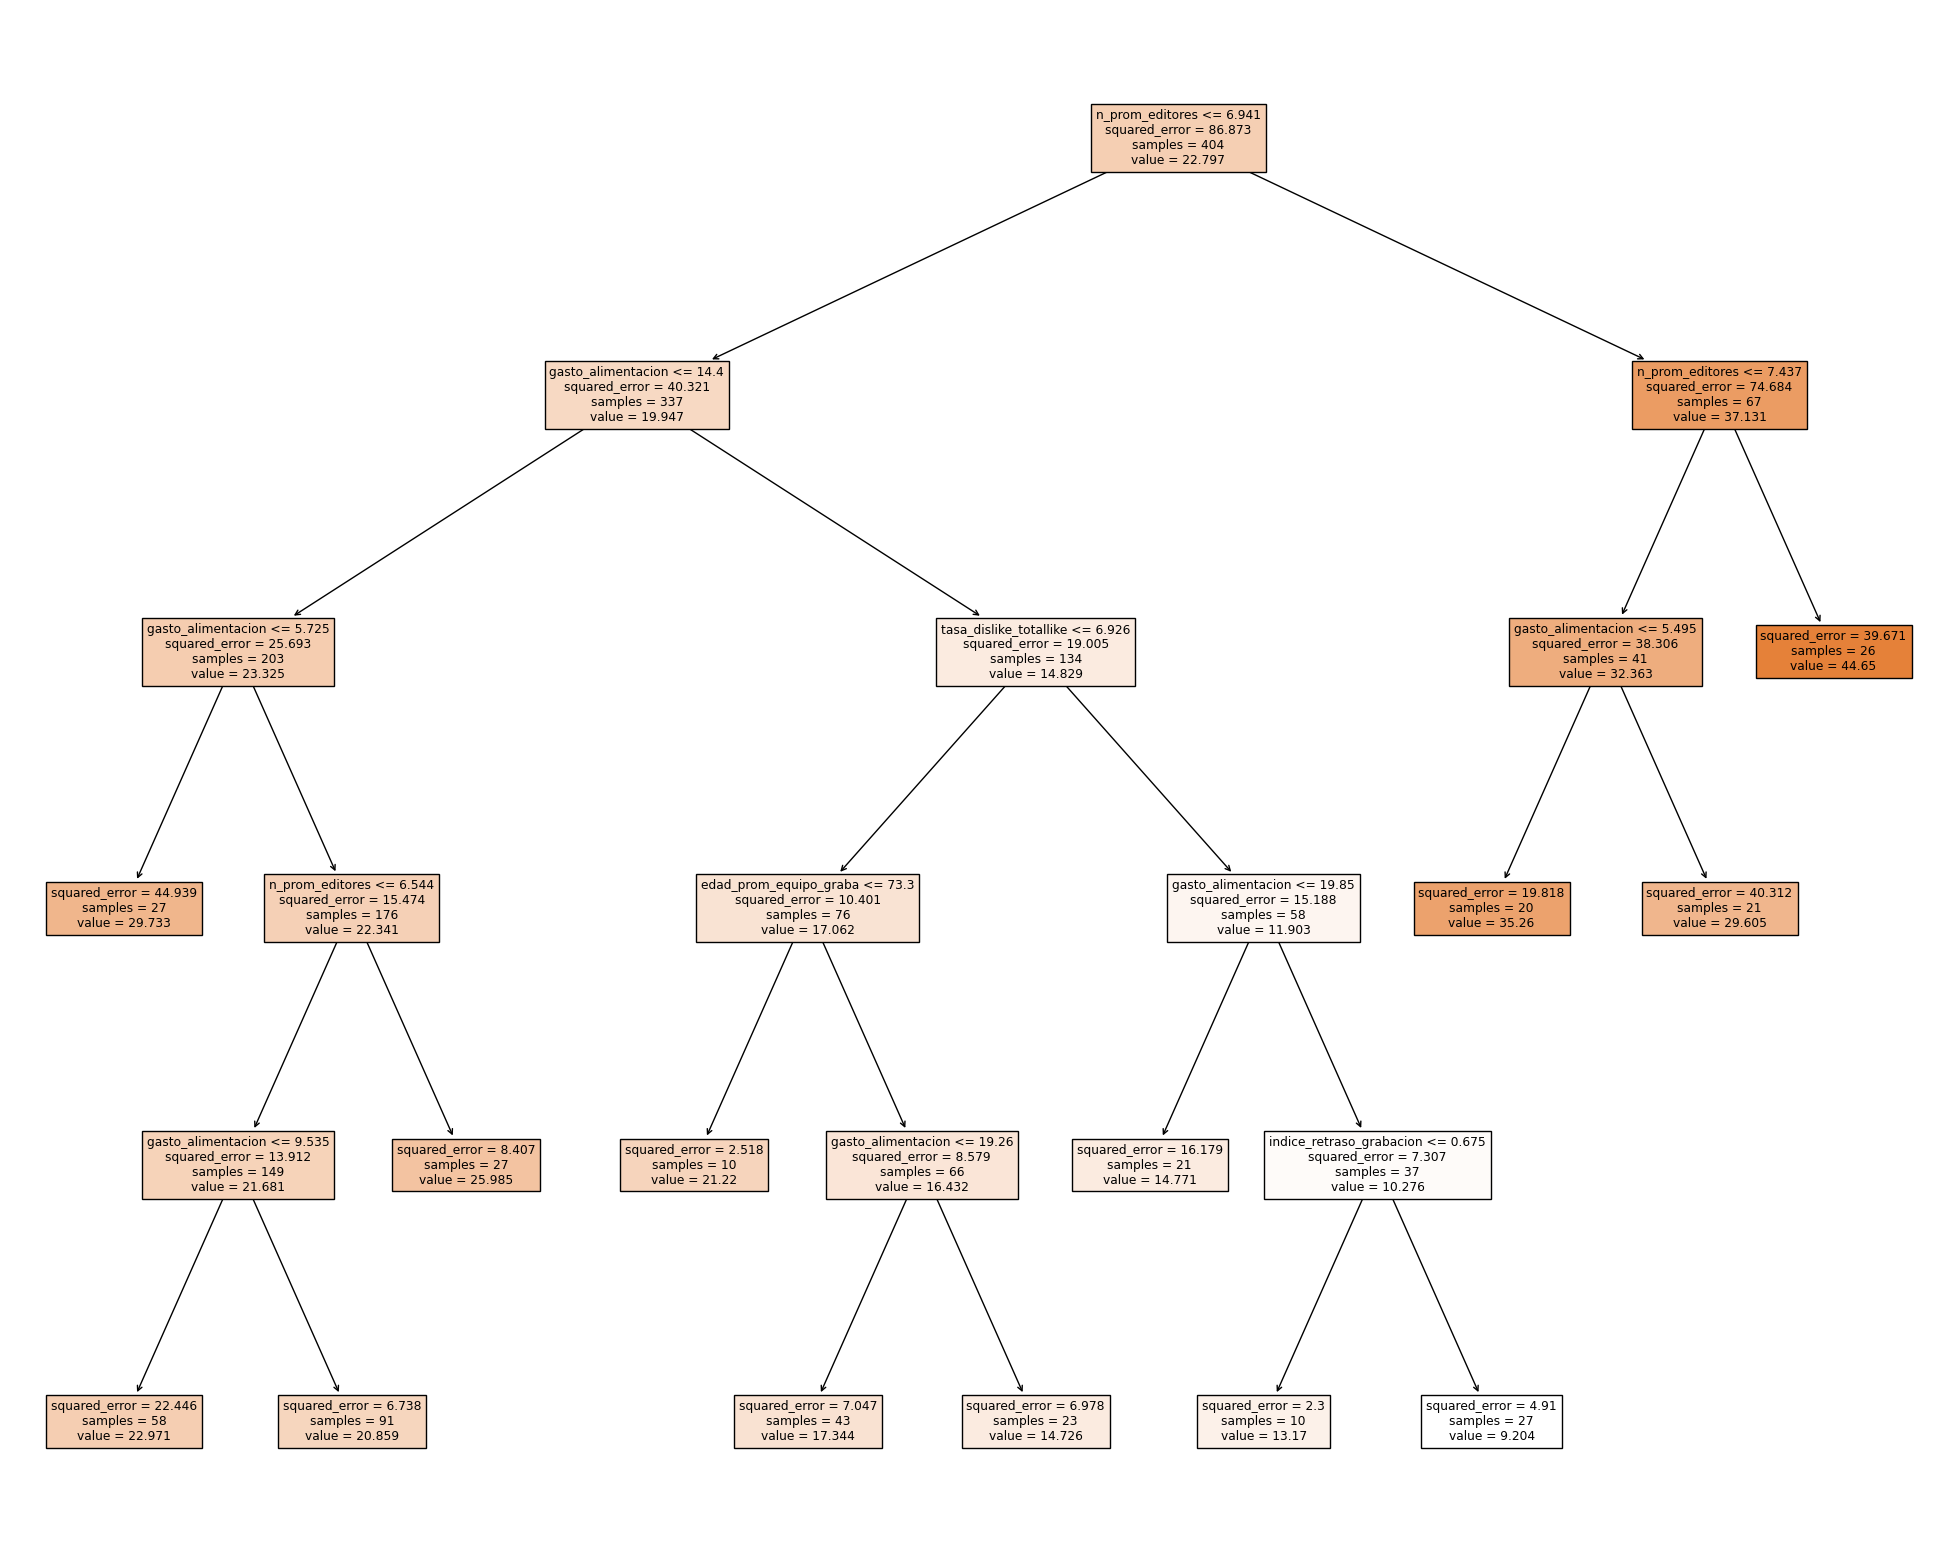

In [12]:
fig= plt.figure(figsize=(25,20))
_= tree.plot_tree(regtree,
                  feature_names=data.columns[:13],
                  class_names=data.columns[13],
                  filled=True)

In [13]:
preds= regtree.predict(X_test)

In [14]:
y_test2=y_test.values

In [15]:
y_test2

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [16]:
error2=(y_test2-preds)**2

In [17]:
sum=error2.sum()

In [18]:
sum/len(y_test)

18.061451096075235

Random forest

In [19]:
forest= RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=10000)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10000, n_jobs=2, oob_score=True)

In [20]:
y_random=forest.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test,y_random)
print(mse)

8.716661096948812


In [22]:
feature_importance2= forest.feature_importances_

<Axes: >

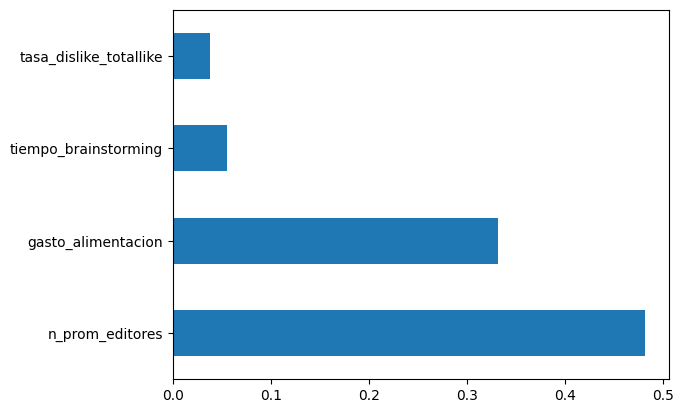

In [23]:
feature_importance2=pd.Series(forest.feature_importances_, index=data.columns[0:13])
feature_importance2.nlargest(4).plot(kind='barh')

XGBOOST

In [24]:
import xgboost as xgb

In [25]:
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

AttributeError: ignored

In [35]:
params = {'objective': 'reg:squarederror',
          'max_depth': 3,
          'learning_rate': 0.1,
          'n_estimators': 10000}


In [36]:
model_xgb = xgb.train(params, d_train, num_boost_round=10000)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:56:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [37]:
preds_xgb = model_xgb.predict(d_test)

In [38]:
rsme = mean_squared_error(y_test, preds_xgb)
print(rsme)

5.820256972492655


In [40]:
features_importance= model_xgb.get_score(importance_type='weight')


In [41]:
feature_importance = sorted(features_importance.items(), key=lambda x: x[1], reverse=True)

('tasa_dislike_totallike', 3070.0)
('n_prom_editores', 2745.0)
('edad_prom_equipo_graba', 2458.0)
('gasto_alimentacion', 2292.0)
('tiempo_brainstorming', 2035.0)
('gasto_rodaje', 2007.0)
('indice_retraso_grabacion', 932.0)
('porcentaje_animadores_totemple', 506.0)
('imp_pagado', 463.0)
('n_editores_clips', 427.0)
('porcentaje_presup_incidentes', 336.0)
('n_plataformas_hab_edic', 190.0)
('se_patrocino', 51.0)


([<matplotlib.axis.XTick at 0x7d51b0375ba0>,
 [Text(0, 0, 'tasa_dislike_totallike'),
  Text(1, 0, 'n_prom_editores'),
  Text(2, 0, 'edad_prom_equipo_graba'),
  Text(3, 0, 'gasto_alimentacion'),
  Text(4, 0, 'tiempo_brainstorming'),
  Text(5, 0, 'gasto_rodaje'),
  Text(6, 0, 'indice_retraso_grabacion'),
  Text(7, 0, 'porcentaje_animadores_totemple'),
  Text(8, 0, 'imp_pagado'),
  Text(9, 0, 'n_editores_clips'),
  Text(10, 0, 'porcentaje_presup_incidentes'),
  Text(11, 0, 'n_plataformas_hab_edic'),
  Text(12, 0, 'se_patrocino')])

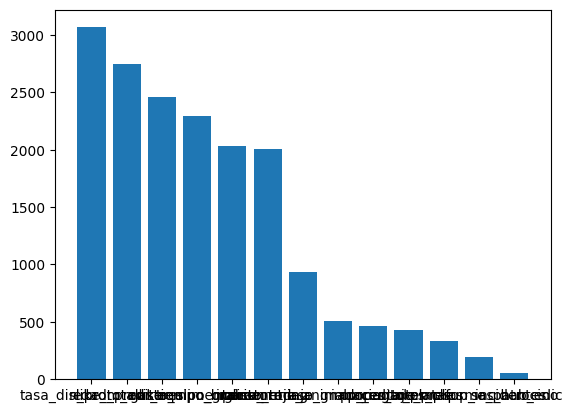

In [43]:
for i in feature_importance:
  print(i)



([<matplotlib.axis.XTick at 0x7d51b01ec1f0>,
 [Text(0, 0, 'tasa_dislike_totallike'),
  Text(1, 0, 'n_prom_editores'),
  Text(2, 0, 'edad_prom_equipo_graba'),
  Text(3, 0, 'gasto_alimentacion'),
  Text(4, 0, 'tiempo_brainstorming'),
  Text(5, 0, 'gasto_rodaje'),
  Text(6, 0, 'indice_retraso_grabacion'),
  Text(7, 0, 'porcentaje_animadores_totemple'),
  Text(8, 0, 'imp_pagado'),
  Text(9, 0, 'n_editores_clips'),
  Text(10, 0, 'porcentaje_presup_incidentes'),
  Text(11, 0, 'n_plataformas_hab_edic'),
  Text(12, 0, 'se_patrocino')])

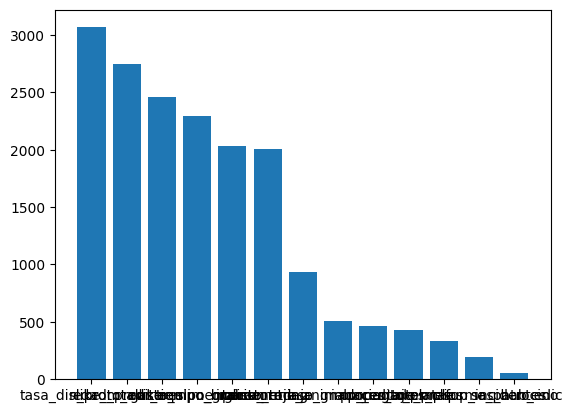

In [44]:
plt.bar(range(len(feature_importance)), [i[1] for i in feature_importance], align='center')
plt.xticks(range(len(feature_importance)), [i[0] for i in feature_importance])

In [45]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.3 MB/s eta 0:00:00


In [46]:
import shap

In [47]:
explainer = shap.TreeExplainer(model_xgb)

[01:06:26] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [48]:
shap_values = explainer.shap_values(X_test)

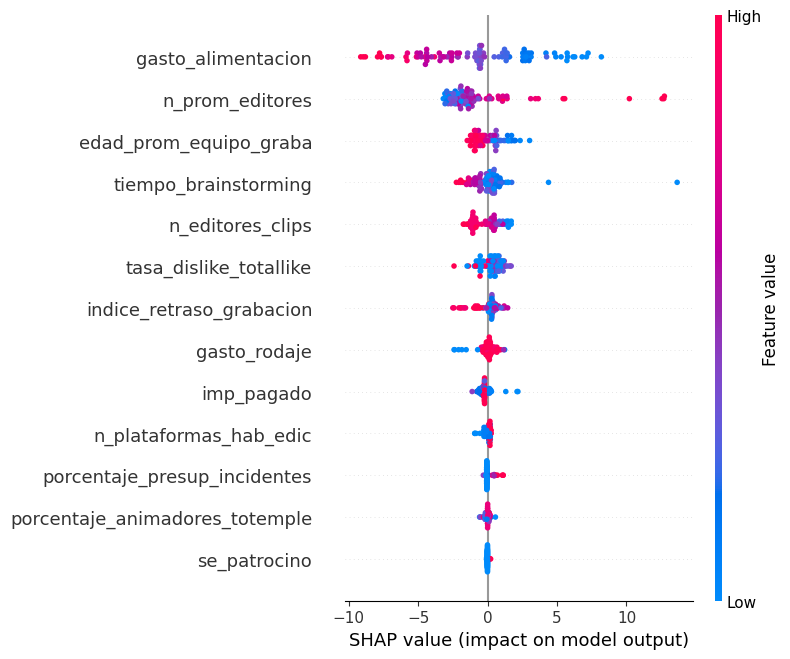

In [49]:
shap.summary_plot(shap_values, X_test)

plot